In [2]:
%pip install networkx

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.6 MB 764.3 kB/s eta 0:00:02
   ------------ --------------------------- 0.5/1.6 MB 764.3 kB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 685.3 kB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 685.3 kB/s eta 0:00:02
   ------------------------------- -------- 1.3/1.6 MB 780.8 kB/s eta 0:00:01
   -------------------------------------- - 1.6/1.6 MB 902.1 kB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 869.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install networkx.algorithms

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement networkx.algorithms (from versions: none)
ERROR: No matching distribution found for networkx.algorithms


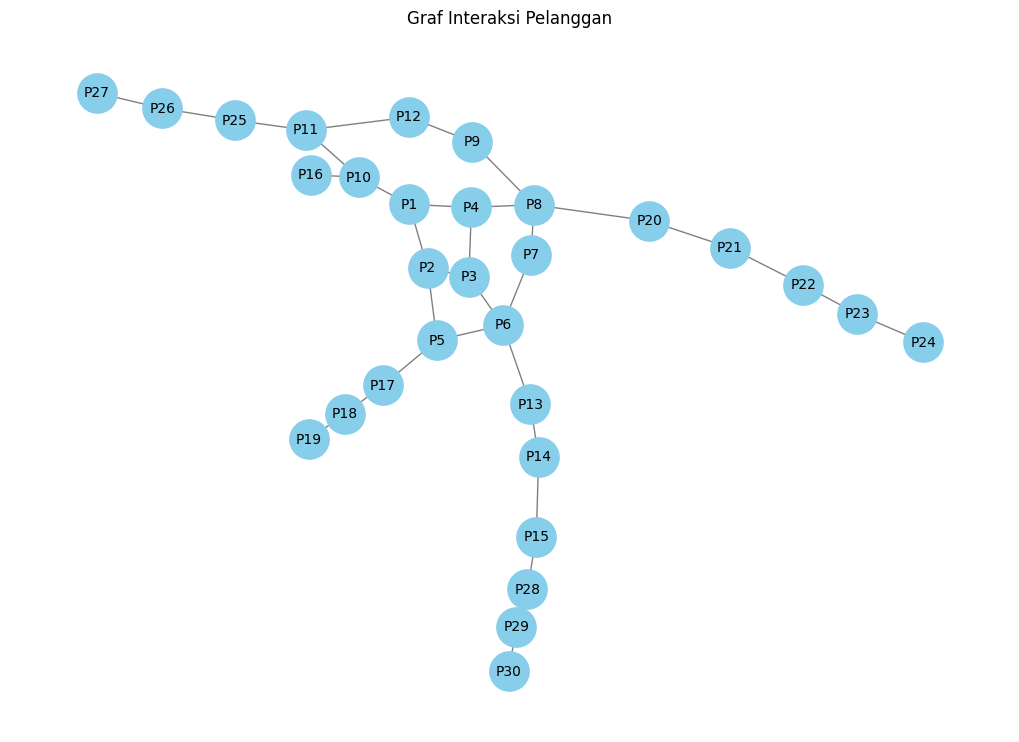

Top 5 Degree Centrality: [('P6', 0.13793103448275862), ('P8', 0.13793103448275862), ('P1', 0.10344827586206896), ('P2', 0.10344827586206896), ('P3', 0.10344827586206896)]
Top 5 Betweenness Centrality: [('P6', 0.4367816091954023), ('P8', 0.4014778325123153), ('P13', 0.2955665024630542), ('P14', 0.24630541871921183), ('P20', 0.24630541871921183)]
Top 5 Closeness Centrality: [('P8', 0.2761904761904762), ('P4', 0.26851851851851855), ('P6', 0.26605504587155965), ('P7', 0.26605504587155965), ('P3', 0.26126126126126126)]
Jumlah komunitas yang terbentuk: 7
Top 5 hubungan baru yang diprediksi: [('P6', 'P8', 16), ('P6', 'P11', 12), ('P6', 'P1', 12), ('P6', 'P2', 12), ('P6', 'P4', 12)]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community, link_prediction

# Data interaksi pelanggan
edges = [
    ("P1", "P2", 5), ("P2", "P3", 8), ("P3", "P4", 2), ("P1", "P4", 10), 
    ("P2", "P5", 3), ("P5", "P6", 7), ("P3", "P6", 4), ("P6", "P7", 6), 
    ("P7", "P8", 12), ("P4", "P8", 9), ("P8", "P9", 5), ("P1", "P10", 14), 
    ("P10", "P11", 6), ("P11", "P12", 3), ("P9", "P12", 8), ("P6", "P13", 5),
    ("P13", "P14", 11), ("P14", "P15", 4), ("P10", "P16", 7), ("P5", "P17", 6),
    ("P17", "P18", 10), ("P18", "P19", 8), ("P8", "P20", 4), ("P20", "P21", 6),
    ("P21", "P22", 5), ("P22", "P23", 7), ("P23", "P24", 3), ("P11", "P25", 9),
    ("P25", "P26", 6), ("P26", "P27", 4), ("P15", "P28", 8), ("P28", "P29", 12),
    ("P29", "P30", 6)
]
# Buat graf
G = nx.Graph()
G.add_weighted_edges_from(edges)
# Visualisasi graf
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=800, font_size=10)
plt.title("Graf Interaksi Pelanggan")
plt.show()
# Hitung centrality metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
# Tampilkan top 5 pelanggan paling berpengaruh
print("Top 5 Degree Centrality:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 Betweenness Centrality:", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 Closeness Centrality:", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
# Deteksi komunitas menggunakan Louvain
communities = community.louvain_communities(G)
print(f"Jumlah komunitas yang terbentuk: {len(communities)}")
# Prediksi hubungan baru menggunakan Preferential Attachment
predicted_links = list(nx.preferential_attachment(G))
top_5_predictions = sorted(predicted_links, key=lambda x: x[2], reverse=True)[:5]
print("Top 5 hubungan baru yang diprediksi:", top_5_predictions)